# 2012年每天的单车共享数量

Capital Bikeshare （美国 Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。训练数据为 2011 年的数据，要求预测 2012 年每天的单车共享数量。

## 导入必要的工具包

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()
plt.rcParams['font.sans-serif'] = ['SimHei']        # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False          # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

## 读取数据

In [16]:
# path to where the data lies
#dpath = './data/'
data = pd.read_csv("day.csv")
data.head()
#data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 数据基本信息

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
### 查看是否有空值
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 探索数据

查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

In [19]:
## 各属性的统计特性
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


此处得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值
可初步了解各特征的分布

### 单变量分布分析

In [20]:
data=data.drop('casual', axis = 1)     #删掉无关特征   casual
data=data.drop('registered', axis = 1) #删掉无关特征   registered
data=data.drop('instant', axis = 1)    #删掉无关特征   instant
data=data.drop('dteday', axis = 1)     #删掉无关特征   dteday

data_2011 = data[data.yr == 0].copy()       #获得训练集
data_2012 = data[data.yr == 1].copy()      #获得测试集

#data_2011=data_2011.drop('yr', axis = 1) #删掉无关特征
#data_2012=data_2012.drop('yr', axis = 1) #删掉无关特征

data_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 12 columns):
season        365 non-null int64
yr            365 non-null int64
mnth          365 non-null int64
holiday       365 non-null int64
weekday       365 non-null int64
workingday    365 non-null int64
weathersit    365 non-null int64
temp          365 non-null float64
atemp         365 non-null float64
hum           365 non-null float64
windspeed     365 non-null float64
cnt           365 non-null int64
dtypes: float64(4), int64(8)
memory usage: 37.1 KB


In [21]:
data_2011.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [22]:
data_2012.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
365,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,2294
366,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,1951
367,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,2236
368,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,2368
369,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,3272


In [23]:
data_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 365 to 730
Data columns (total 12 columns):
season        366 non-null int64
yr            366 non-null int64
mnth          366 non-null int64
holiday       366 non-null int64
weekday       366 non-null int64
workingday    366 non-null int64
weathersit    366 non-null int64
temp          366 non-null float64
atemp         366 non-null float64
hum           366 non-null float64
windspeed     366 non-null float64
cnt           366 non-null int64
dtypes: float64(4), int64(8)
memory usage: 37.2 KB


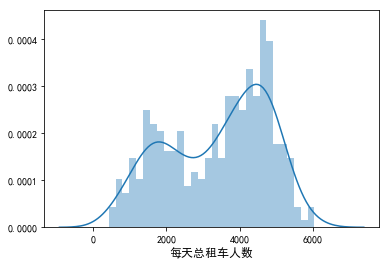

In [24]:
# 目标y（总租车人数）的直方图／分布
fig = plt.figure()
sns.distplot(data_2011.cnt.values, bins=30, kde=True)
plt.xlabel('每天总租车人数', fontsize=12)
plt.show()

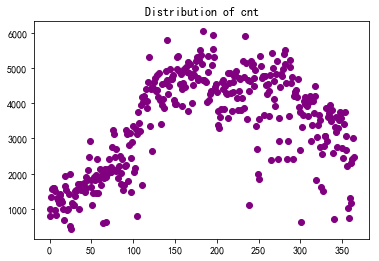

In [25]:
# 单个特征散点图
plt.scatter(range(data_2011.shape[0]), data_2011["cnt"].values,color='purple')
plt.title("Distribution of cnt");

In [26]:
data_2012.shape

(366, 12)

## 输入属性的直方图／分布

天气情况的分布，1 晴天 2 雾天 3 小雨小雪 4 大雨大雪大雾

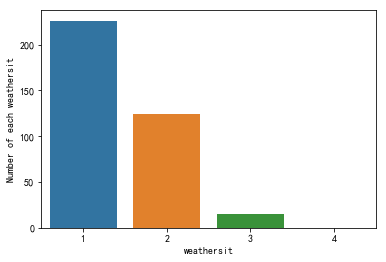

In [27]:
sns.countplot(data_2011.weathersit, order=[1,2,3,4]);
plt.xlabel('weathersit');
plt.ylabel('Number of each weathersit');

## 两两特征之间的相关性

In [28]:
data_2011=data_2011.drop('temp', axis = 1) #删掉强相关特征
data_2012=data_2012.drop('temp', axis = 1) #删掉强相关特征
data_2011=data_2011.drop('season', axis = 1) #删掉强相关特征
data_2012=data_2012.drop('season', axis = 1) #删掉强相关特征

#data_2011=data_2011.drop('weathersit', axis = 1) #删掉无关特征
#data_2012=data_2012.drop('weathersit', axis = 1) #删掉无关特征
#get the names of all the columns
cols=data_2011.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data_2011.corr().abs()
data_corr.shape

(10, 10)

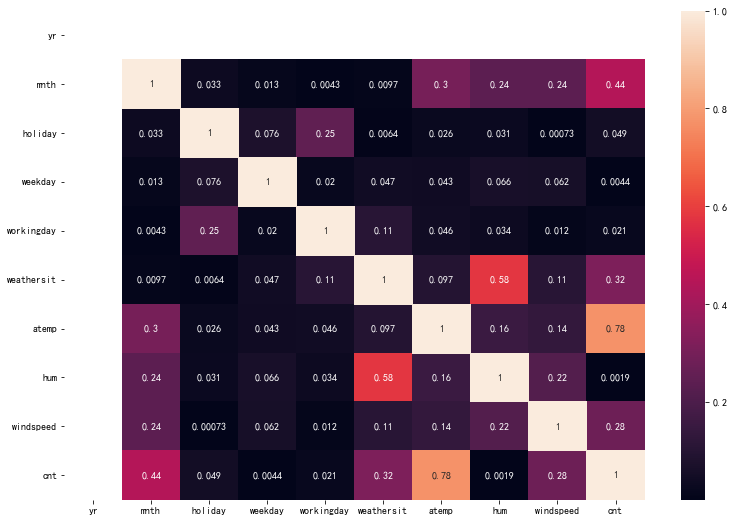

In [29]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('Capital_Bikeshare.png' )
plt.show()

In [30]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

atemp and cnt = 0.78
weathersit and hum = 0.58


temp  and temp 这俩个特征强相关，去掉 temp 特征

In [31]:
#data_2011=data_2011.drop('temp', axis = 1) #删掉无关特征
#data_2012=data_2012.drop('temp', axis = 1) #删掉无关特征

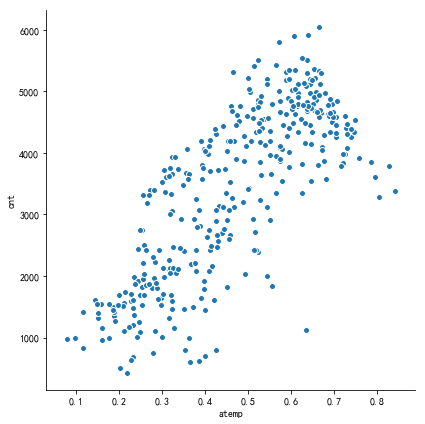

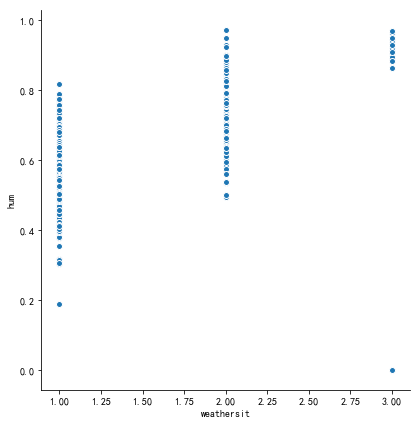

In [32]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(data_2011, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

训练数据准备

In [33]:
# 从原始数据中分离输入特征x和输出y
#y = data_2011['cnt'].values
#X = data_2011.drop('cnt', axis = 1)

#用于后续显示权重系数对应的特征
#columns = X.columns

#将数据分割训练数据与测试数据
#from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
#X_train.shape


# 从原始数据中分离输入特征x和输出y
y_train = data_2011['cnt'].values
X_train = data_2011.drop('cnt', axis = 1)

#用于后续显示权重系数对应的特征
columns = X_train.columns

# 从原始数据中分离输入特征x和输出y
y_final = data_2012['cnt'].values
X_final = data_2012.drop('cnt', axis = 1)


# 使用L2正则对标签做归一化

In [34]:
from sklearn import preprocessing
x=np.array([[1.,-1.,2.],
            [2.,0.,0.],
            [0.,1.,-1.]])
x_normalized=preprocessing.normalize(x,norm='l2')
print(x_normalized)

# 可以使用processing.Normalizer()类实现对训练集和测试集的拟合和转换
normalizer=preprocessing.Normalizer().fit(x)
print(normalizer)
normalizer.transform(x)

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
Normalizer(copy=True, norm='l2')


array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [35]:
# 数据标准化
from sklearn import preprocessing

# 分别对训练和测试数据的特征以及目标值进行标准化处理
#X_train = ss_X.fit_transform(X_train)
#X_final = ss_X.transform(X_final)

#y_train = preprocessing.normalize(y_train.reshape,norm='l2')   #转化为列向量
#y_final = preprocessing.normalize(y_final.reshape,norm='l2')  #reshape转化为列向量
normalizer=preprocessing.Normalizer().fit(y_train.reshape(-1,1))
print(normalizer)
normalizer.transform(y_train.reshape(-1,1))

Normalizer(copy=True, norm='l2')


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [36]:
min(y_final),max(y_final),y_train,y_final

(22,
 8714,
 array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
        1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
         986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
        1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
        1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
        1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
        2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
        3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
        1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
        2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
        4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
        4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
        4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
        4492, 4978, 4677, 

# L2正则 --> 岭回归

In [37]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV
from sklearn.metrics import r2_score  #评价回归预测模型的性能

#设置超参数（正则参数）范围
alphas = [ 0.001, 0.1, 1, 10,100]

#n_alphas = 200
#alphas = np.logspace(-10,2,n_alphas)

#生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas,store_cv_values=True)  

#模型训练
ridge.fit(X_train, y_train)    

#预测
X_final_pred_ridge = ridge.predict(X_final)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of RidgeCV on test is', r2_score(y_final, X_final_pred_ridge))


The r2 score of RidgeCV on test is -0.7358905603262433


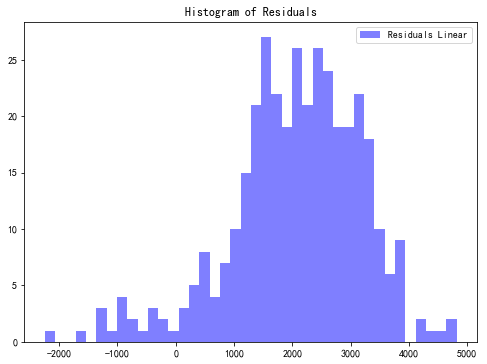

In [38]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_final - X_final_pred_ridge,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

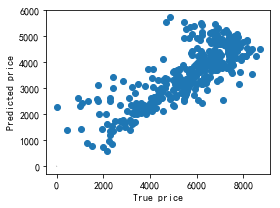

In [39]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_final, X_final_pred_ridge)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

# L2可视化

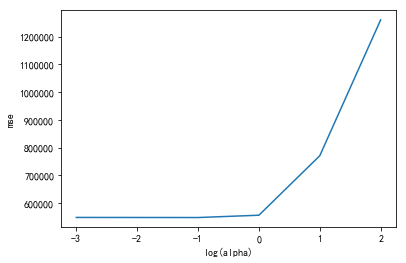

alpha is: 0.1


,coef_ridge,columns
6,5490.491668,atemp
1,92.206302,mnth
3,21.647805,weekday
4,20.444419,workingday
0,0.000000,yr
2,-317.474554,holiday
5,-505.169444,weathersit
7,-563.908933,hum
8,-2097.880897,windspeed


In [40]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_ridge'],ascending=False)

# L1正则 --> Lasso

In [41]:
from sklearn.linear_model import LassoCV

#设置超参数搜索范围
#alphas = [ 0.01, 0.1, 1, 10,100]

#生成一个LassoCV实例
#lasso = LassoCV(alphas=alphas)  
lasso = LassoCV()  

#训练（内含CV）
lasso.fit(X_train, y_train)  

#测试
y_test_pred_lasso = lasso.predict(X_final)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_final, y_test_pred_lasso))

The r2 score of LassoCV on test is -0.7483986918986898


In [42]:
y_final_pred_ridge = lasso.predict(X_final)
print ('The r2 score of RidgeCV on test is', r2_score(y_final, y_final_pred_ridge))

The r2 score of RidgeCV on test is -0.7483986918986898


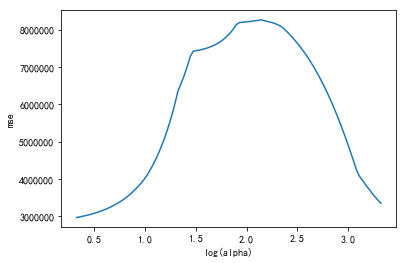

alpha is: 2.1106486695440045


In [43]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)